# Descriptive Statistic
[Short Description](./assets/Descriptive%20Statistic.pptx)

With the given data


creating the data frame using this dictionary
(you may copy the source code and paste it in your code editor)
```python
data = {
    'section 1':[13,8,18.5,8.5,12.5,12,8.5,7.5,6.5,13,14,8.5,8.5,15,11,12.5],
    'section 2':[10,7,12,15,11,13.5,13,13,3,7.5,15,8,11.5,5,10,11],
    'section 3':[16,14,16,15,15,19,15.5,17,12,15,17,15,16,17,14,13],
    'section 4':[12,6.5,12.5,16.5,17,20,10,12,2,5,9,10,18,12.5,7,13]
}
frame = pd.DataFrame(data)
frame
```


In [ ]:
import pandas as pd

to get all the description, use the function describe
```python
frame.describe()
```

We can get only some described statistic by calling the related methods
```python
frame.count()
```

In addition, we can find the described statistic for only some parameter
```python
frame['section 1'].min()
```

All descriptive function which can be called is provided


![image-20230806163647409](./assets/image-20230806163647409.png)

You may try calling the functions
```python
farme.var()
```

In some statisticl data, like correlation, and covariance are compare from pairs of parameter

Lest's download the data of the stock prices and volumes obtained from Yahoo! finance and calculate for the covarience

The yfinance which is the third party library is used to get the data from Yahoo! finance (the original pandas_datareader is not working with Yahoo! finance anymore) [yfinance](https://pypi.org/project/yfinance/)

To install the library, you may use the following command
```python
!pip install yfinance
```

**Note** Yahoo has updated their api, so we need the fixed version of pandas_datareader which implemented the new api provided by third party. (The official one is still wait for the pull request for this update)




The following code is used to get the data from Yahoo! finance
```python
import pandas as pd
import yfinance as yf
all_data = {ticker: yf.Ticker(ticker).history(period="10y")
            for ticker in ['GOOG','IBM']}
all_data

```

The data is stored in the dictionary, you can get the data of each stock by calling the key of the dictionary
```python
all_data['GOOG']
```

we can extract create the data frame of price from each stock
```python
price = pd.DataFrame({ticker: data['Close']
                      for ticker, data in all_data.items()})
price
```

and create the data frame of Volume
```python
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})
volume
```

The data frame of price and volume are shown as given
```python
price['GOOG']
price['IBM']
```

The percent changed of each day is calculated as time series (described in later class) is shown as given

**Hint** tail() function is used to show the last data, the default is 5 data, you may change the number of showed data by add the number you want to show as the input parameter of the tail methods

```python
returns = price.pct_change()
returns.tail()
```

The corr method, and cov methods will calculate the correlation and covarience of the overlapping, non-NA,
aligned-by-index values in two Series
```python
returns['GOOG'].corr(returns['IBM'])
returns['GOOG'].cov(returns['IBM'])
```

we can call pct_change() method to calculate the percent change of each day


So we can calculate the correlation between the price change and volume change
```python
changePrice['GOOG'].corr(volumeChange['GOOG'])
price['GOOG'].corr(volume['GOOG'])
```

# Described statistic Hand ons


You can get the data frame of exchange rate between THB



and USD using the given source code.
The provider of the data is from [Fred, St.Louis Fed](https://fred.stlouisfed.org/), you can search for many data provided by them using the given code and change the reader index to the value you want to get





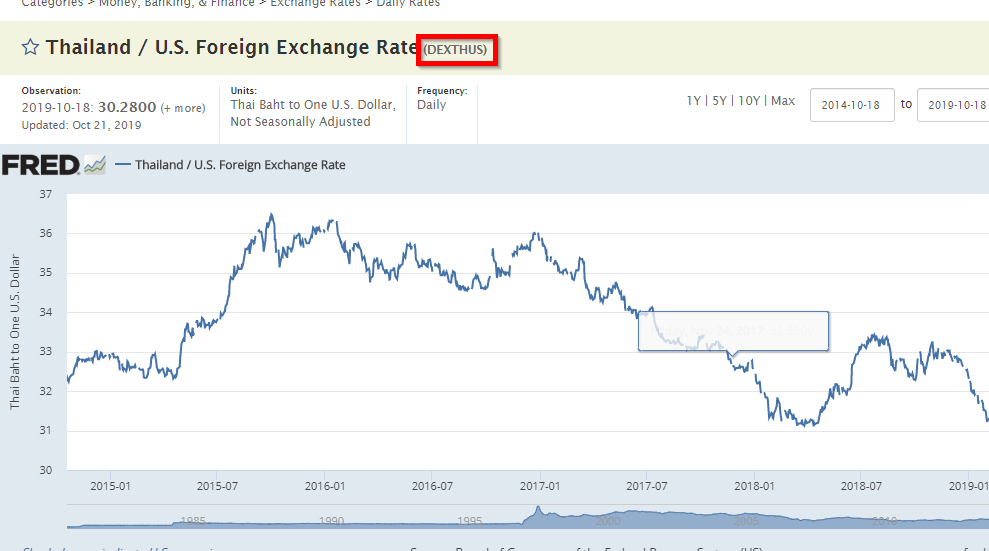



The pandas data reader is used to get the data from the given source
We need to upgrade the pandas_datareader to read the new format of the web site using the given code

```
!pip install pandas_datareader --upgrade
```


To get the exchange rate from the FRED (Federal Reserve Economic Data) from the given code
```python
import pandas_datareader.data as web
thusd = web.get_data_fred('DEXTHUS')
thusd
```

**Task** Write the code to show the minimum exchnage rate, maximum exchange rate
the standard deriviation, the exchange rate which at percentile 90

get the date which the mininum exchange rate, maximum exchnage rate, and the exchange rate which is at percentilie 90 are

**Hint**: to get the index name of the data you need, you can use the code example

In [ ]:
import numpy as np
a = pd.DataFrame(np.arange(10).reshape(5,2),columns=['c1','c2'])
# get the list of index name which the value in series c1 is equal to 8
a.c1[a.c1 == 8].index.tolist()

#### Task

Loading the Crude Oild Prices from fred (using this data "Crude Oil Prices: Brent - Europe"),
Show the covarience, and correlation of the value the oil price  and the exchange rate. and the covarience, and corelation of the percent change for both of them.

# Data Loading



Pandas support many data loading scheme and Data sources

There are many format that the pandas support

Start by the very simple one, the csv file

csv is standed for comma seperate value, the value is seperated by the comma you can see the example [here](./examples/example.csv)

The ex1.csv is provided n the examples folder

you can check the content using notepads or in IDEs

Then we create the dataframe from the given csv file
```python
df = pd.read_csv('examples/ex1.csv')
df
```


Some file may not contain a header row, for example this [file ex2.csv](./examples/ex2.csv)

We can assign default column names
```python
pd.read_csv('examples/ex2.csv', header=None)
```

or we can set the name ourselves
```python
pd.read_csv('examples/ex2.csv', names=['a','b','c','d','message'])
```


What if we missed the column name, what will be return?
```python
pd.read_csv('examples/ex2.csv', names=['c','d','message'])
```

If we want to form the hierachical index from multiple column, you can use the [file csv_mindex.csv](./examples/csv_mindex.csv), and the code as given
```python
parsed = pd.read_csv('examples/csv_mindex.csv')
parsed
```

the index column can be set
```python
parsed = pd.read_csv('examples/csv_mindex.csv',
                     index_col=['key1','key2'])
parsed
```

To write the csv from pandas, symply use to_csv method.


read the data from the example file
```python
data = pd.read_csv('examples/ex3.csv')
data
```

Write out the file

then refresh the Files pane to see the output
```python
data.to_csv('examples/out.csv')
```

Check the content of the file in out.csv, and ex3.csv

We can redirect the output to the console to see the output before writing the file, using the `sys.stdout` instead of the file name
In addition

We can change the seperator using the given snippet

and handle with the NaN data using the `na_rep` parameter
```python
import  sys
data.to_csv(sys.stdout)
data.to_csv(sys.stdout,sep='|')

data.to_csv(sys.stdout, na_rep = 'NULL')
```

# Handons loading csv


With the given [file sample.csv](./examples/samples.csv), create the DataFrame which is similar to the data frame in

![image-20230806173037975](./assets/image-20230806173037975.png)


and then select only the index which total score (the summation score in section 1,2,3,4 is more than 50 and write out to the file name out1.csv)

# Reading the Excel file



One of the popular data source is the excel file
We can get the pandas retrive the data to the data frame for further implementation.

With the [example file](examples/ex1.xlsx), load the file as given


Then we have to import the excel file using the given code
```python
xlsx = pd.ExcelFile('examples/ex1.xlsx')
xlsx
```
**note** if there are some errors occur, please find the way to fix it :P

Then we have to select which sheet we want to retrieve data
```python
df = pd.read_excel(xlsx,'Sheet1')
df
```

`The unnamed`: column is shown as there is some special data is stored in the excel file, so we can filter it using the given code
```python
df = df[df.filter(regex='^(?!Unnamed)').columns]
df
```

Or we can make the read_excel shorter than call 2 times as given
```python
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame
```


If the data frame is in the first row, and first column, we can specified the start row, and column.
For example, the given [file](https://drive.google.com/open?id=1FAwZewZknR-eQKTVJELoVrpKdpxjEQ1U)

```python
frame = pd.read_excel('examples/samples.xlsx',sheet_name='Sheet1',
                      index_col= 0,usecols="B:K",

                      skiprows=4,nrows=33)
frame
```

**Hint,** to show all row you may set it by


The default value is 10
```python
pd.set_option('display.max_rows', None)
```

### Task
Frame the sample.xlsx data frame.

Try to show the students whose grade is C, C+


then show the lowest score to get C, the highest score to get C+

# Getting data from Web APIs


Some web site provide the WebAPIs which we can receive data using json object
Try to click on this [link](https://api.github.com/repos/pandas-dev/pandas/issues)

you will see the list of last 30 GitHub issue for pandas on Github,
we can add read the data using the Python as given
```python
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp
```


The response object show the response code (200 means it is successfully downloaded)

To read the data which come with it. Use the json method
```python
data = resp.json()
data
```

To filter the data, The json is similar to the list of map data structure, we use the index, and key to get the data
```python
data[0]['title']
```

So we can create the the dataframe from the given json object
```python
issues = pd.DataFrame(data, columns=['number','title',
                                     'labels','state'])
issues
```

Getting data from other source
---
Pandas provide the tools to get historic data from many remote data source [link text](https://pydata.github.io/pandas-datareader/remote_data.html)
Some of them required the key, some are not. You can see the usage in the given link.


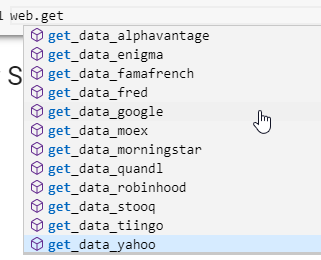

What you have to do is just add the code to the correct provider

The list of datasource is also [shown](https://github.com/wilsonfreitas/awesome-quant#data-sources)

In [ ]:
web.get